# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
amin = 65.70297029702971
a = amin+200
print(a)
bmin = 0.25*(3*a-4)
bmax = (1/21)*(41*a-1680)
bmin,bmax

265.7029702970297


(198.2772277227723, 438.7534181989627)

In [3]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [4]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [5]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':265.7029,
    'stickiness_wi':4000,
    'stickiness_bt':438, # 100
    'sparsity':1,
    'pvar': 0,
    'lrate':1,
    'lratep':0.2,
    'decay_rate':1,
} 
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_265.703-stickiness_wi_4000.000-stickiness_bt_438.000-sparsity_1.000-pvar_0.000-lrate_1.000-lratep_0.200-decay_rate_1.000-beta2_0.000'

### main

In [6]:
ns = 15
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [7]:
## accuracy
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([0.54248596, 0.48875   , 0.4905897 , 0.54774351, 0.49708333])

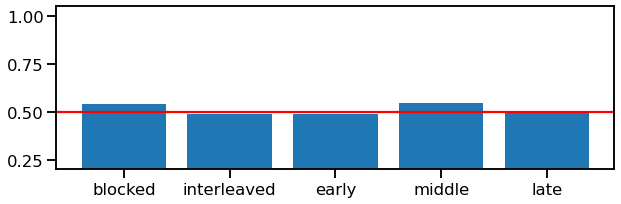

In [8]:
plt.figure(figsize=(10,3))
plt.bar(condL,test_acc)
plt.ylim(0.2,1.05)
plt.axhline(0.5,c='r')

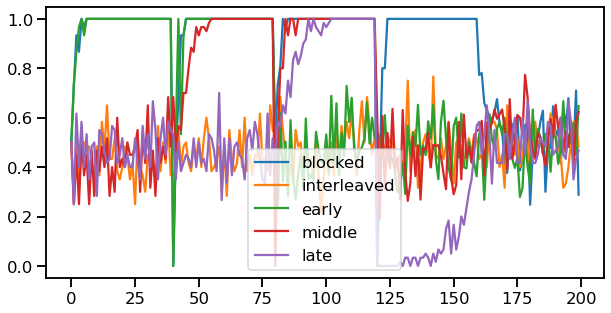

In [9]:
plt.figure(figsize=(10,5))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()


<BarContainer object of 5 artists>

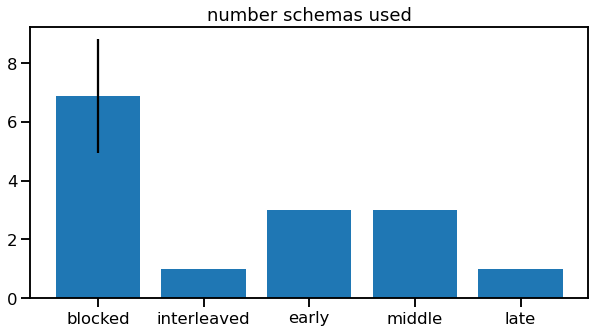

In [10]:
## count number of schemas used
def count_num_schemas(exp_data):
  """ 
  """
  L = []
  for curr_idx in range(5):
    num_schemas_used = [
      len(np.unique(exp_data[curr_idx][i]['zt'][:,:-1].flatten())
         ) for i in range(ns)
    ]
    L.append(num_schemas_used)
  nschemas = np.array(L)
  return nschemas


nschemas = count_num_schemas(exp_batch_data)
M = nschemas.mean(1)
S = nschemas.std(1)
plt.figure(figsize=(10,5))
plt.title('number schemas used')
plt.bar(condL,M,yerr=S)

# model state

In [11]:
curr_idx = 0
seed_idx = 0

In [12]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [13]:
tstep = 3
sch = 0
priors[:,tstep,sch]


array([4000.8, 4001.6, 4002.4, 4003.2, 4004. , 4004.8, 4005.6, 4006.4,
       4007.2, 4008. , 4008.8, 4009.6, 4010.4, 4011.2, 4012. , 4012.8,
       4013.6, 4014.4, 4015.2, 4016. , 4016.8, 4017.6, 4018.4, 4019.2,
       4020. , 4020.8, 4021.6, 4022.4, 4023.2, 4024. , 4024.8, 4025.6,
       4026.4, 4027.2, 4028. , 4028.8, 4029.6, 4030.4, 4031.2, 4032. ,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
         32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,   32.2,
      